# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
data = soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
rows = []
combined_rows = []

# Loop through the "data-row" classes to fill the combined_rows list
for row in data:

    # Extract all the data rows within the class
    tds = row.find_all('td')

    # Loop through the data rows to populate the rows list
    for td in tds:
        rows.append(td.text)

    # Append the newly populated rows list to the outer list
    combined_rows.append(rows.copy())

    # Clear the rows list to start fresh in the next iteration
    rows.clear()

# show the list of lists
combined_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(combined_rows, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
browser.quit()

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
df['id'] = df['id']
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int32')
df['ls'] = df['ls'].astype('int32')
df['month'] = df['month'].astype('int32')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [13]:
# CYA
origDF = df.copy()

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
max(df['month'])

12

In [15]:
# 2. How many sols (Martian days) worth of data are there?
df['sol'].nunique()

1867

In [16]:
# Create a working copy of the database for finding averages
avg_df = df.copy()

# Check for missing values
avg_df.dropna(inplace=True)


In [17]:
# 3. What is the average minimum temperature by month?
monthly_temp = avg_df.groupby(avg_df['month'])['min_temp'].mean()
monthly_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

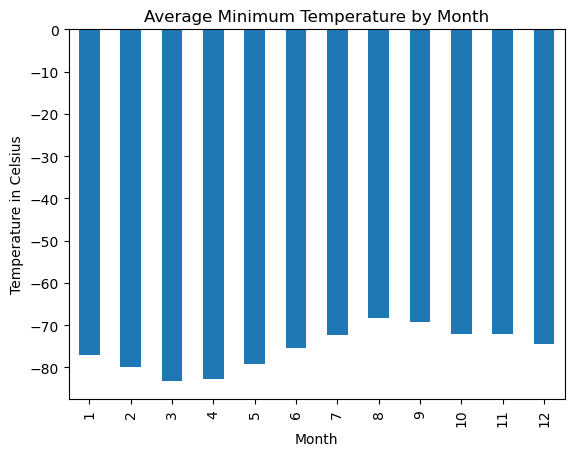

In [18]:
# Plot the average minimum temperature by month
monthly_temp.plot.bar()

# Update title and labels
plt.title('Average Minimum Temperature by Month')

plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Show the plot
plt.show()

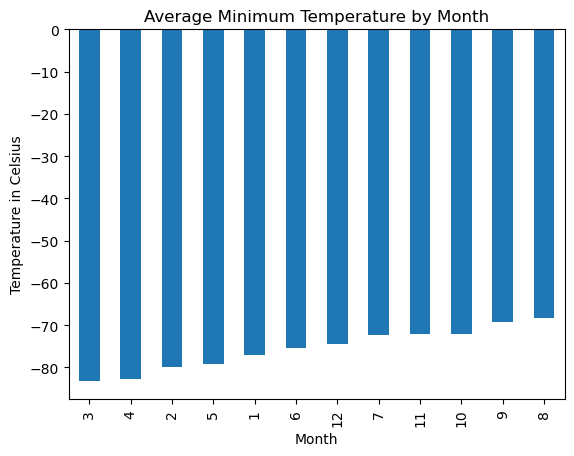

Coolest Month: 3, with an average of -83.30729166666667 C
Warmest Month: 8, with an average of -68.38297872340425 C


In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the dataframe
monthly_temp2 = avg_df.groupby('month')['min_temp'].mean().sort_values(ascending=True)

# Plot the data
monthly_temp2.plot.bar()

# Populate the title and labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Visualize the chart
plt.show()

# Visualize the answer to the question
print(f'Coolest Month: {monthly_temp2.index[0]}, with an average of {monthly_temp2.iloc[0]} C')
print(f'Warmest Month: {monthly_temp2.index[-1]}, with an average of {monthly_temp2.iloc[-1]} C')

In [20]:
# 4. What is the average pressure by month?
monthly_prsr = avg_df.groupby('month')['pressure'].mean()
monthly_prsr

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

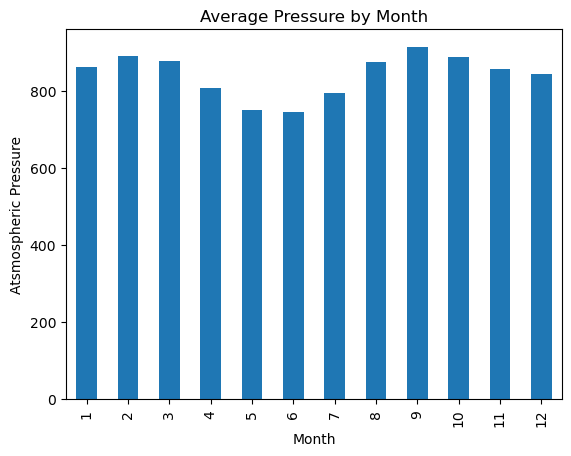

In [21]:
# Plot the average pressure by month
monthly_prsr.plot.bar()

# Populate the title and labels
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atsmospheric Pressure')

# Visualize the chart
plt.show()

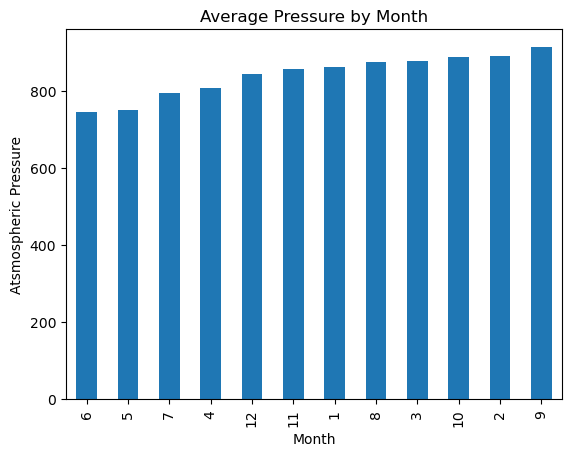

Lowest Pressure Month: 6, with an average of 745.0544217687075
Highest Pressure Month: 9, with an average of 913.3059701492538


In [22]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the dataframe
monthly_prsr2 = avg_df.groupby('month')['pressure'].mean().sort_values(ascending=True)

# Plot the data
monthly_prsr2.plot.bar()

# Populate the title and labels
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atsmospheric Pressure')

# Visualize the chart
plt.show()

# Visualize the answer to the question
print(f'Lowest Pressure Month: {monthly_prsr2.index[0]}, with an average of {monthly_prsr2.iloc[0]}')
print(f'Highest Pressure Month: {monthly_prsr2.index[-1]}, with an average of {monthly_prsr2.iloc[-1]}')

In [23]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Sols (Martian Days) per Martian year - to establish a baseline

# Filter the df to show only month 1
month1_df = avg_df[avg_df['month'] == 1]
sol_month1_df = month1_df.sort_values(by='sol')

# Add a column for the difference between the current sol and the next one
sol_month1_df['to_next_sol'] = sol_month1_df['sol'].shift(-1) - sol_month1_df['sol']

# Filter to only the first sol of month1
first_sol_df = sol_month1_df[sol_month1_df['to_next_sol'] > 9]

print(f'Martian Days in a Martian Year:  {first_sol_df['to_next_sol'].iloc[0]}')

first_sol_df

Martian Days in a Martian Year:  608.0


,id,terrestrial_date,sol,ls,month,min_temp,pressure,to_next_sol
356,372,2013-10-02,411,29,1,-82.0,887.0,608.0
985,1013,2015-08-20,1080,29,1,-77.0,882.0,608.0


In [24]:
# Earth Days per Martian year - to answer the question

# Filter the df to show only month 1, sort by terrestrial date
month1_df = avg_df[avg_df['month'] == 1]
td_month1_df = month1_df.sort_values(by='terrestrial_date')

# Add a column for the difference between the current t_date and the next one
td_month1_df['to_next_t_date'] = (
    td_month1_df['terrestrial_date'].shift(-1) - 
    td_month1_df['terrestrial_date']
).dt.days

# Filter to only the first terrestrial date of month1
first_day_df = td_month1_df[td_month1_df['to_next_t_date'] > 10]

numDays = print(f'Earth Days in a Martian Year:  {first_day_df['to_next_t_date'].iloc[0]}')

first_day_df


Earth Days in a Martian Year:  625.0


,id,terrestrial_date,sol,ls,month,min_temp,pressure,to_next_t_date
356,372,2013-10-02,411,29,1,-82.0,887.0,625.0
985,1013,2015-08-20,1080,29,1,-77.0,882.0,625.0


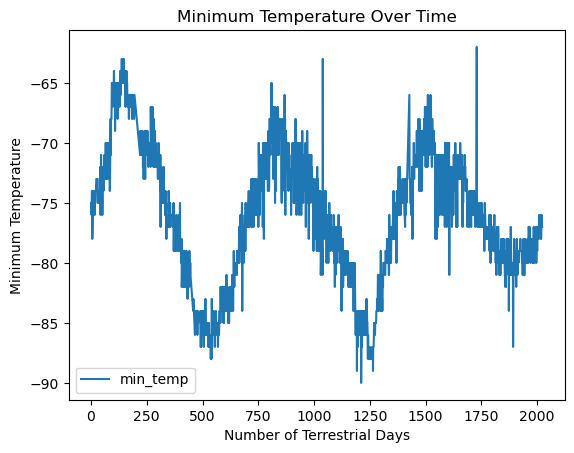

In [25]:
# Visually estimate the result (Earth Days in a Martian Year) 
# by plotting the daily minimum temperature of each observation in the data set.

final_df = avg_df.copy()

# Find the minimum date
min_tday = final_df['terrestrial_date'].min()

# Calculate the number of days since the minimum date, starting from 1
final_df['terrestrial_days'] = (final_df['terrestrial_date'] - min_tday).dt.days + 1

# Plot the min temps by terrestrial days
final_df.plot.line(x='terrestrial_days', y='min_temp')

# Populate the title and labels
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')

# Visualize the chart
plt.show()

#### Minimum Temperature
Coolest Month: 3, with an average of -83.30729166666667 C
Warmest Month: 8, with an average of -68.38297872340425 C

#### Atmospheric Pressure
Lowest Pressure Month: 6, with an average of 745.0544217687075
Highest Pressure Month: 9, with an average of 913.3059701492538

#### Year Length

Earth Days in a Martian Year:  625.0

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
final_df.to_csv('webscraping_df_output.csv', index=False)